<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Felipe Hernández
- Nombre de alumno 2: Brandon Peña


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/brandonHaipas/MDS7202-Lab-Prog-Ciencia-de-Datos)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2  13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3  11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4   8.0  0.0       0.0        1.0  29.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       5.0   
1           0.0     1.0      0.0                0.0      3.0       0.0   
2           1.0     1.0      1.0                0.0      1.0       0.0   
3           1.0     1.0      1.0                0.0      3.0       0.0   
4           1.0     1.0      1.0                0.0      2.0       0.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0      30.0       0.0     0.0     1.0       0.0  
1       0.0       0.0     1.0     1.0       0.0  
2      10.0       0.0     0.0     0.0       0.0  
3       3.0       0.0     0.0     1.0       0.0  
4       0.0       0.0     0.0     0.0       0.0

## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [2]:
!pip install xgboost

Para mantener uniformidad de resultados a través de las ejecuciones de este notebook, se fijará el `random_state` en esta celda bajo el nombre `seed`.

In [3]:
seed = 88

In [4]:
# Exploración de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [5]:
df.describe()

Age           Sex      HighChol     CholCheck           BMI  \
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000   
mean       8.584055      0.456997      0.525703      0.975259     29.856985   
std        2.852153      0.498151      0.499342      0.155336      7.113954   
min        1.000000      0.000000      0.000000      0.000000     12.000000   
25%        7.000000      0.000000      0.000000      1.000000     25.000000   
50%        9.000000      0.000000      1.000000      1.000000     29.000000   
75%       11.000000      1.000000      1.000000      1.000000     33.000000   
max       13.000000      1.000000      1.000000      1.000000     98.000000   

             Smoker  HeartDiseaseorAttack  PhysActivity        Fruits  \
count  70692.000000          70692.000000  70692.000000  70692.000000   
mean       0.475273              0.147810      0.703036      0.611795   
std        0.499392              0.354914      0.456924      0.487345   
min        0.000000              0.000000      0.000000      0.000000   
25%        0.000000              0.000000      0.000000      0.000000   
50%        0.000000              0.000000      1.000000      1.000000   
75%        1.000000              0.000000      1.000000      1.000000   
max        1.000000              1.000000      1.000000      1.000000   

            Veggies  HvyAlcoholConsump       GenHlth      MentHlth  \
count  70692.000000       70692.000000  70692.000000  70692.000000   
mean       0.788774           0.042721      2.837082      3.752037   
std        0.408181           0.202228      1.113565      8.155627   
min        0.000000           0.000000      1.000000      0.000000   
25%        1.000000           0.000000      2.000000      0.000000   
50%        1.000000           0.000000      3.000000      0.000000   
75%        1.000000           0.000000      4.000000      2.000000   
max        1.000000           1.000000      5.000000     30.000000   

           PhysHlth      DiffWalk        Stroke        HighBP      Diabetes  
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000  
mean       5.810417      0.252730      0.062171      0.563458      0.500000  
std       10.062261      0.434581      0.241468      0.495960      0.500004  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      1.000000      0.500000  
75%        6.000000      1.000000      0.000000      1.000000      1.000000  
max       30.000000      1.000000      1.000000      1.000000      1.000000

In [6]:
df.shape

(70692, 18)

In [7]:
non_binary_cols = ['GenHlth', 'MentHlth','PhysHlth', 'BMI', 'Age']

In [8]:
binary_cols = []
for col in df.columns:
    if col not in non_binary_cols:
        print(f"valores únicos para la columna {col}: {df[col].nunique()}")
        if col != 'Diabetes':
            binary_cols.append(col)

valores únicos para la columna Sex: 2
valores únicos para la columna HighChol: 2
valores únicos para la columna CholCheck: 2
valores únicos para la columna Smoker: 2
valores únicos para la columna HeartDiseaseorAttack: 2
valores únicos para la columna PhysActivity: 2
valores únicos para la columna Fruits: 2
valores únicos para la columna Veggies: 2
valores únicos para la columna HvyAlcoholConsump: 2
valores únicos para la columna DiffWalk: 2
valores únicos para la columna Stroke: 2
valores únicos para la columna HighBP: 2
valores únicos para la columna Diabetes: 2


In [89]:
df['GenHlth'].value_counts()

GenHlth
3.0    23427
2.0    19872
4.0    13303
1.0     8282
5.0     5808
Name: count, dtype: int64

In [9]:
# número de valores únicos para las escalas de salud
health_scales = ['MentHlth', 'PhysHlth', 'GenHlth']
for i in health_scales:
    print(f"La escala {i} tiene {df[i].nunique()} valores distintos")

La escala MentHlth tiene 31 valores distintos
La escala PhysHlth tiene 31 valores distintos
La escala GenHlth tiene 5 valores distintos


In [91]:
import plotly.express as xp
# Salud general
hist = xp.histogram(df, x="GenHlth", title="GenHlth distribution")
hist.show()

In [92]:
# Salud mental?
hist_2 = xp.histogram(df, x="MentHlth", title="MentHlth distribution")
hist_2.show()

In [93]:
# BMI
hist_3 = xp.histogram(df, x="BMI", title="BMI distribution")
hist_3.show()

In [94]:
# edad
hist_4 = xp.histogram(df, x="Age", title="Age distribution")
hist_4.show()

In [95]:
# Salud física
hist_5 = xp.histogram(df, x="PhysHlth", title="PhysHlth distribution")
hist_5.show()

De esta exploración podemos notar que `Age`, `BMI`, `GenHlth`, `MentHlth` y `PhysHlth` son variables numéricas no binarias. Podemos decir que en todas estas variables tiene sentido que haya un orden, puesto que corresponden a números en una escala o derechamente a una edad. Se aplicará un `RobustScaler` para lidiar con los outliers de `MentHlth`, `BMI` y `PhysHlth`; se aplicará un `MinMaxScaler` sobre `Age` y `GenHlth` por su distribución más regular y también sobre los datos binarios puesto que sus valores no cambiarán.

In [10]:
# Column Transformer de preprocesamiento
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    transformers = [
            (
                "MinMax Scaler",
                MinMaxScaler(),
                ["Age", "GenHlth"] + binary_cols
            ),
            (
                "Robust Scaler",
                RobustScaler(),
                ["MentHlth", "BMI", "PhysHlth"]
            )
        ],
    verbose_feature_names_out=False
)

preprocessing.set_output(transform='pandas')

ColumnTransformer(transformers=[('MinMax Scaler', MinMaxScaler(),
                                 ['Age', 'GenHlth', 'Sex', 'HighChol',
                                  'CholCheck', 'Smoker', 'HeartDiseaseorAttack',
                                  'PhysActivity', 'Fruits', 'Veggies',
                                  'HvyAlcoholConsump', 'DiffWalk', 'Stroke',
                                  'HighBP']),
                                ('Robust Scaler', RobustScaler(),
                                 ['MentHlth', 'BMI', 'PhysHlth'])],
                  verbose_feature_names_out=False)

In [11]:
# split de datos en entrenamiento y test
from sklearn.model_selection import train_test_split
y = df['Diabetes']
X = df.drop('Diabetes', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state= seed)

In [12]:
# pipeline
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

xgb_pipeline = Pipeline(
   steps = [
            ("Preprocesamiento", preprocessing),
            ("XGBClassifier", XGBClassifier())
        ]
)

In [13]:
# Entrenamiento
xgb_pipeline.fit(X_train, y_train)

# Evaluación
from sklearn.metrics import classification_report
y_pred_baseline = xgb_pipeline.predict(X_test)
print(f'Evaluación de xgboost sin finetunning\n{classification_report(y_test, y_pred_baseline)}')

Evaluación de xgboost sin finetunning
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     11712
         1.0       0.73      0.79      0.76     11852

    accuracy                           0.75     23564
   macro avg       0.75      0.75      0.75     23564
weighted avg       0.75      0.75      0.75     23564



2. *  ¿Es acaso un buen predictor de diabetes? R: Depende. La métrica más crítica para decidir si el modelo es un buen predictor en este contexto es recall, dado que se busca minimizar la cantidad de falsos negativos, pues clasificar a un paciente enfermo como sano es clínicamente grave. No obstante, las métricas de precision, y en consecuencia, f1-score son también relevantes. Dado que el modelo tiene un recall de 0.79 y f1-score de 0.76 para la clase positiva, podría decirse que se acerca a tener buenos resultados. Sin embargo, en el contexto clínico se podría ser más exigente para decir que es un buen predictor, por ejemplo, solicitando un recall mayor a 0.85.
   * ¿Qué buscan explicar las métricas utilizadas? R: Como ha sido mencionado, precision mide la tasa de predicciones realizadas correctamente, recall mide la proporción de pacientes de una clase que fueron correctamente detectados y f1-score es un promedio armónico entre las otras dos, lo que permite observar un balance entre ambas métricas.
   * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features? R: No directamente, pues son métricas que permiten evaluar el desempeño general del modeo, pero no indican explícitamente la bondad de las features seleccionadas. Para ello, podrían observarse la importancia de las features o la contribución de cada una con SHAP values.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

In [15]:
# Obtención del clasificador
xgb_clf = xgb_pipeline.named_steps['XGBClassifier']

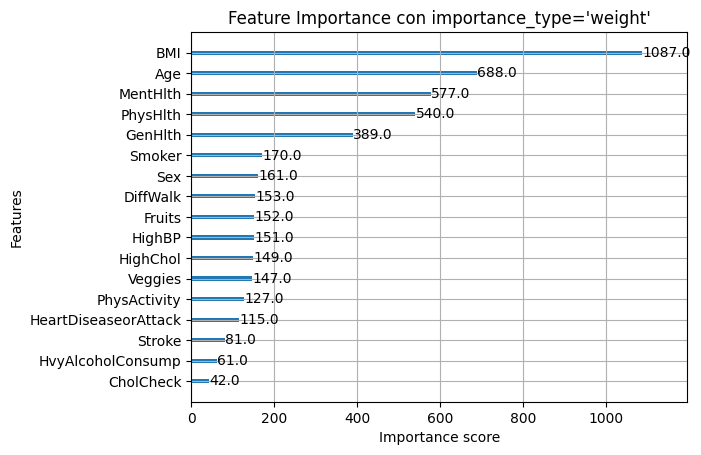

In [16]:
# plot_importance con weight
import xgboost as xgb
import matplotlib.pyplot as plt

# weight: numbero de veces que una feature es usada para dividir la data
xgb.plot_importance(xgb_clf, max_num_features=17, importance_type="weight")
plt.title("Feature Importance con importance_type='weight'")
plt.show()

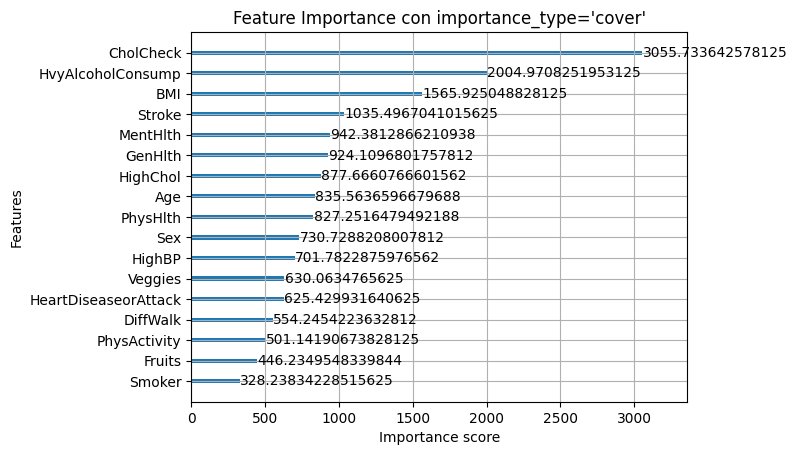

In [102]:
# plot_importance con weight

import xgboost as xgb
import matplotlib.pyplot as plt

# weight: numbero de veces que una feature es usada para dividir la data
xgb.plot_importance(xgb_clf, max_num_features=17, importance_type="cover")
plt.title("Feature Importance con importance_type='cover'")
plt.show()

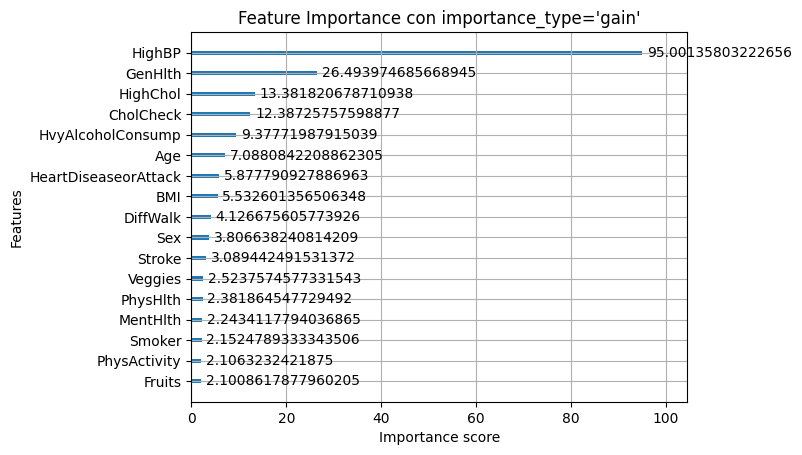

In [103]:
# plot_importance con weight

import xgboost as xgb
import matplotlib.pyplot as plt

# weight: numbero de veces que una feature es usada para dividir la data
xgb.plot_importance(xgb_clf, max_num_features=17, importance_type="gain")
plt.title("Feature Importance con importance_type='gain'")
plt.show()

2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. R:  Los resultados obtenidos con cáda método son diferentes, pero es normal ver estas diferencias, dado que cada uno mide la importancia de las features desde un punto de vista distinto. `weight` mide la importancia de la feature según su frecuencia de aparición en el árbol. Así, el BMI o la Edad del paciente son variables con las cuales se decide con mayor frecuencia. `gain` mide cuánto mejora, en promedio, la ganancia del árbol en los splits donde se usa la variable. Con esto, HighBP parece separar mejor los datos en los nodos donde se utiliza, ofreciendo una mayor ganancia. Finalmente,  `cover` mide el coverage promedio (es decir, la cantidad promedio de observaciones que se ven afectadas por los splits de la feature), donde la mayor importanca la obtiene CholCheck.
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? R: Estas importancias por si solas no son suficientes, dado que no permiten tener una visión local de cómo afectan la clasificación de cada observación, así como tampoco permiten entender cómo estas variables afectan a la performance global del modelo.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [21]:
# Permutation feature importance
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score

# recibe un df de pandas X, una serie y, una metrica, un random state
def custom_permutation_importance(clf, X, y, metric=mean_squared_error, n_times=10, random_state=seed, importance_cal = 'diff'):
    if importance_cal not in ['diff', 'div']:
        raise Exception('Invalid argument for importance type')
    baseline_score = metric(clf.predict(X), y)
    rng = np.random.RandomState(random_state)
    # features
    features = clf.get_booster().feature_names
    raw_result = np.zeros(shape=(len(features), n_times))
    # repeat n times
    for i in range(0, n_times):
        idx = 0
        for col in features:
            X_perm = X.copy(deep=True)
            #shuffle the column
            shuffled = X_perm[col].sample(frac=1, random_state = rng.randint(0, n_times*100)).reset_index(drop=True)
            X_perm[col] = shuffled
            perm_score = metric(y, clf.predict(X_perm))
            importance = None
            if importance_cal == 'diff':
                importance = baseline_score - perm_score
            elif importance_cal == 'div':
                importance = perm_score/baseline_score
            if importance is None:
                raise Exception("Unexpected behaviour")
            raw_result[idx, i] += importance
            idx +=1

    return {"importance_mean": raw_result.mean(axis=1), "importance_std": raw_result.std(axis=1), "importances":raw_result}   

In [22]:
subpipeline = Pipeline(xgb_pipeline.steps[:-1])
processed_x_test = subpipeline.transform(X_test)
importances_output = custom_permutation_importance(xgb_clf, processed_x_test, y_test, n_times=30, metric = f1_score)

/tmp/ipykernel_8804/3085694460.py:2: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



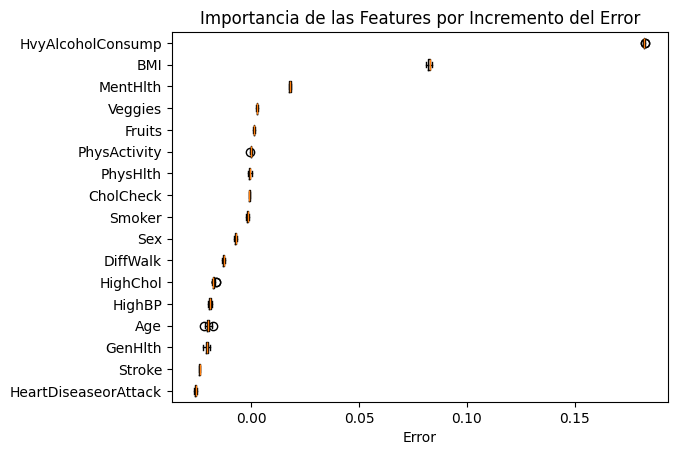

In [119]:
perm_sorted_idx = importances_output['importance_mean'].argsort()
plt.boxplot(
    importances_output['importances'][perm_sorted_idx].T,
    vert=False,
    labels=np.array(xgb_clf.get_booster().feature_names)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

4. - ¿Cómo mide la importancia de las features su propuesta? R: La propuesta corresponde al cálculo de _Permutation Feature Importance_, que rompe la relación entre la feature y la variable dependiente al aleatorizar el orden de esta, y permite entender cúanto aumenta el error global del modelo, como una medida de importancia. Así, mientras más disminuye la performance, más importante es la variable.
   - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? **DISCLAIMER: El siguiente análisis es realizado en base a nuestro conocimiento médico sobre la diabetes, que, al no tener formación profesional en el tema, puede ser poco preciso.**
   En orden, estas son:  
      1. HayAlcoholConsump: La más importante corresponde al consumo de alcohol. El alcohol, al contener azucar, es un potencial factor de riesgo. Probablemente, los pacientes que consumen alcohol tienen mucha más probabilidad de padecer diabetes, luego tiene sentido.
      2. BMI: El índice de masa corporal puede indicar sobrepeso o malos hábitos alimenticios, luego tiene sentido que sea una variable relevante.
      3. MentHlth: Enfermedades asociadas a salud mental, como trastornos de ansiedad o similares, pueden estar asociados a desórdenes alimenticios que hagan que los pacientes sean más propensos a padecer diabetes, luego tiene sentido su relevancia.
      4. Veggies: El consumo de vegetales puede ser indicio de si el paciente tiene una alimentación saludable, lo que valida su importancia para la predicción.
      5. Fruits: De manera análoga al punto 4, esta variable tiene sentido y probablemente posee menor importancia dado que las frutas, a diferencia de los vegetales, pueden contener mayor cantidad de azúcares.
   - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? R: El órden de las variables obtenidas tiene mayor similitud con las del método `cover` de la sección anterior. Sin embargo, el análisis presentado dista considerablemente de los resultados obtenidos previamente, además de que con este método existe mayor certeza de cómo las variables afectan a la performance de modelo.
   - Nombre y explique 3 ventajas y 3 desventajas del método implementado. 
   R: 
   
      Ventajas:
      - El método es agnóstico al modelo.
      - Permite obtener una visión global de las importancias de las features.
      - Refleja la importancia real de las features sobre la variable dependiente a partir de métricas de desempeño del modelo.
      
      Desventajas:
      - Al realizar permutaciones, puede ser potencialmente costoso computacionalmente.
      - Es dependiente de la métrica de desempeño utilizada.
      - Es sensible a variables altamente correlacionadas o redundantes, dado que la permutación de una no afectará al modelo, dado que puede obtener la información necesaria para trabajar a partir de la otra.

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [17]:
!pip install shap

In [18]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [23]:
import shap

explainer = shap.TreeExplainer(xgb_clf)
# cambiar X por el 'x' de mi dataset completo
X = pd.concat([X_train, X_test])
processed_X = subpipeline.transform(X)
shap_values = explainer(processed_X)

In [26]:
# Shap values para la primera instancia
shap_values.values[1,:]

array([ 0.6560979 ,  0.9135804 ,  0.17032842, -0.26567066,  0.02088476,
        0.04105211,  0.43757433, -0.01985509,  0.10920591, -0.02119922,
        0.01293486, -0.02535745, -0.01052796, -0.5081433 ,  0.01909715,
       -0.429994  ,  0.21373613], dtype=float32)

2. ¿Qué representa cada número en su resultado? R: `shap_values` contiene una matriz donde cada número representa la contribución sobre el valor esperado de la salida del modelo si no tuviera información adicional (valor base) para una feature en una observación particular del dataset.
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? Si, los valores positivos aumentan la probabilidad de clasificar con 1 (luego, clasificar con diabetes) y los negativos aumentan la de clasificar a 0.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

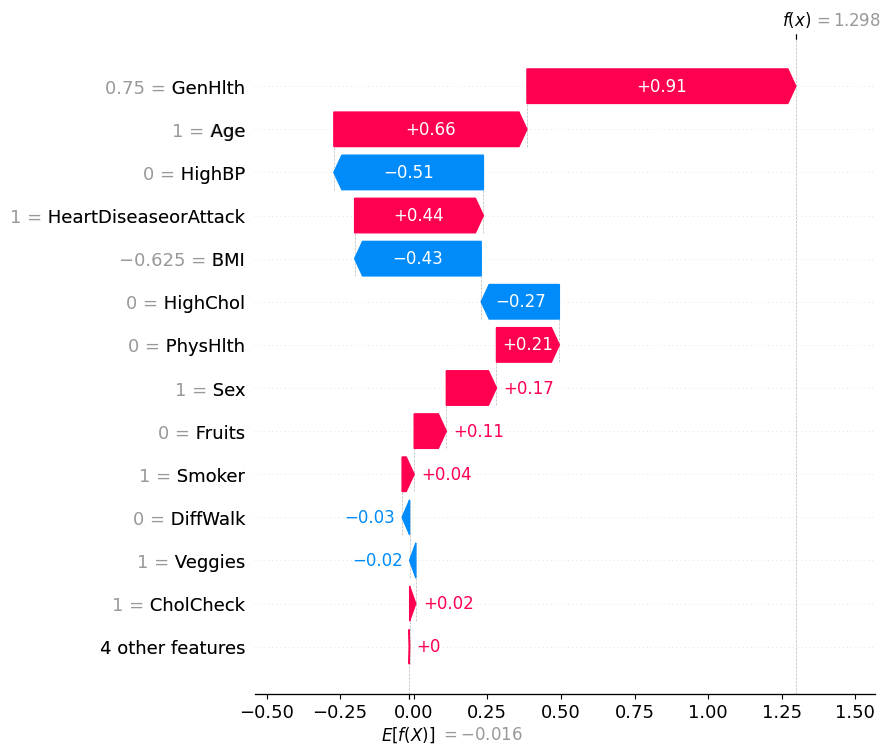

In [126]:
idx = 1

shap.initjs()
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

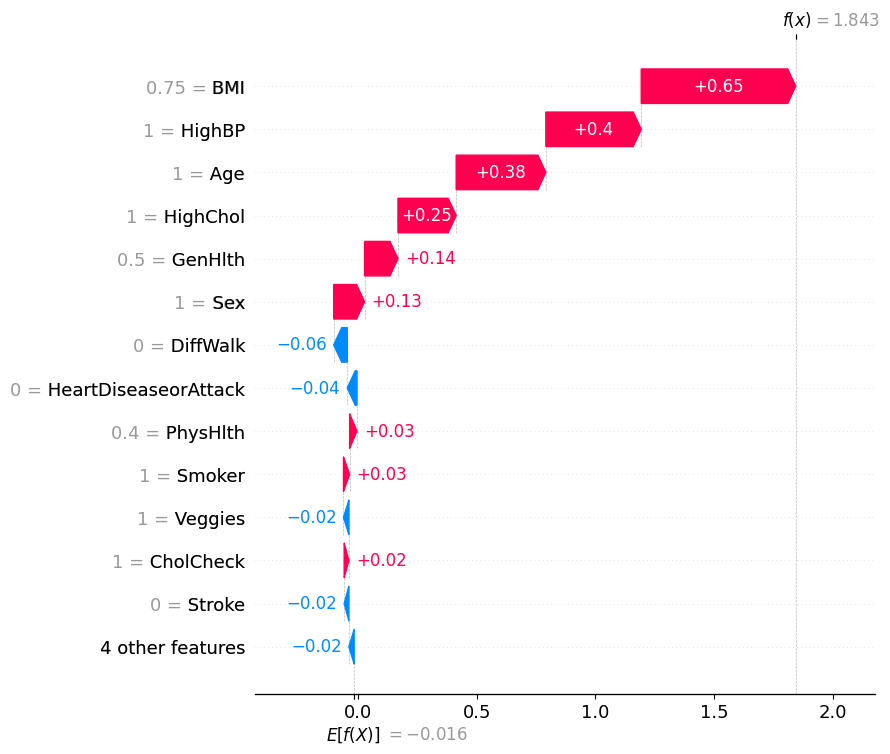

In [127]:
idx = 9

shap.initjs()
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

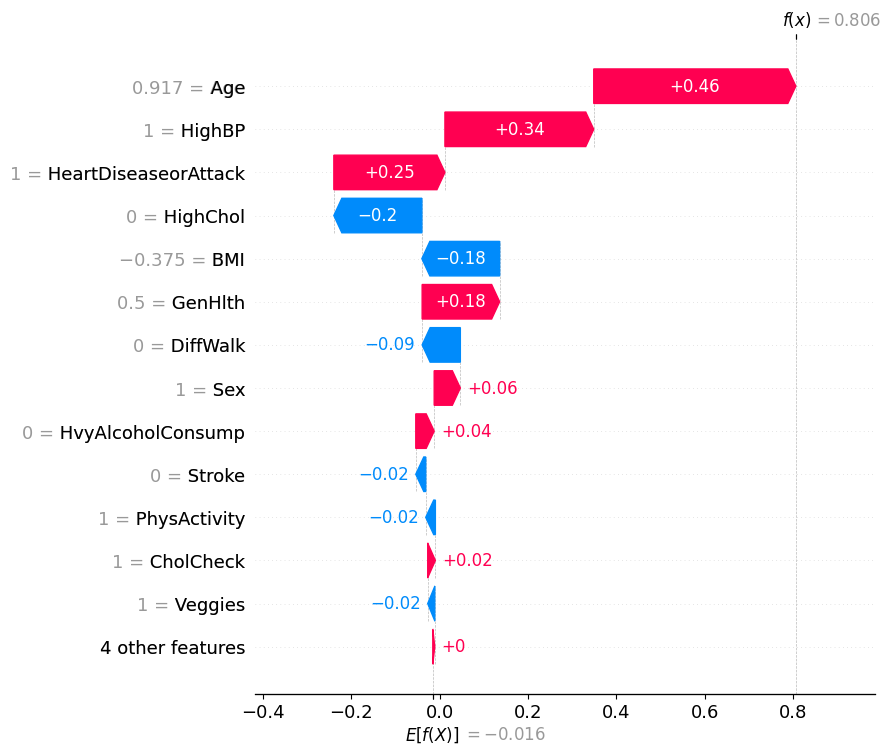

In [128]:
idx = 150

shap.initjs()
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? R: Los gráficos nos permiten observar qué variables afectan positivamente (en rojo) y negativamente (en azul) la predicción. Por ejemplo, para la instancia 1, variables como GenHlth y Age aumentan la probabilidad de tener diabetes, mientras que HighBP y BMI la disminuyen.

  - ¿Existe algún patrón común entre las instancias analizadas? R. Si, existen ciertos patrónes comunes. Por ejemplo, la variable Age afecta positivamente la probabilidad de tener diabetes en los tres casos, mientras que Veggies la disminuye. Por otro lado, pacientes con BMI negativo afectan negativamente la predicción, mientras que los que tienen valor positivo lo afectan positivamente.

  - ¿Es posible generalizar estas conclusiones a todo el dataset? R: No directamente, dado que los SHAP values se interpretan de forma local, luego no es posible generalizar estas conclusiones sin antes observar una mayor cantidad de datos, o un promedio global.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

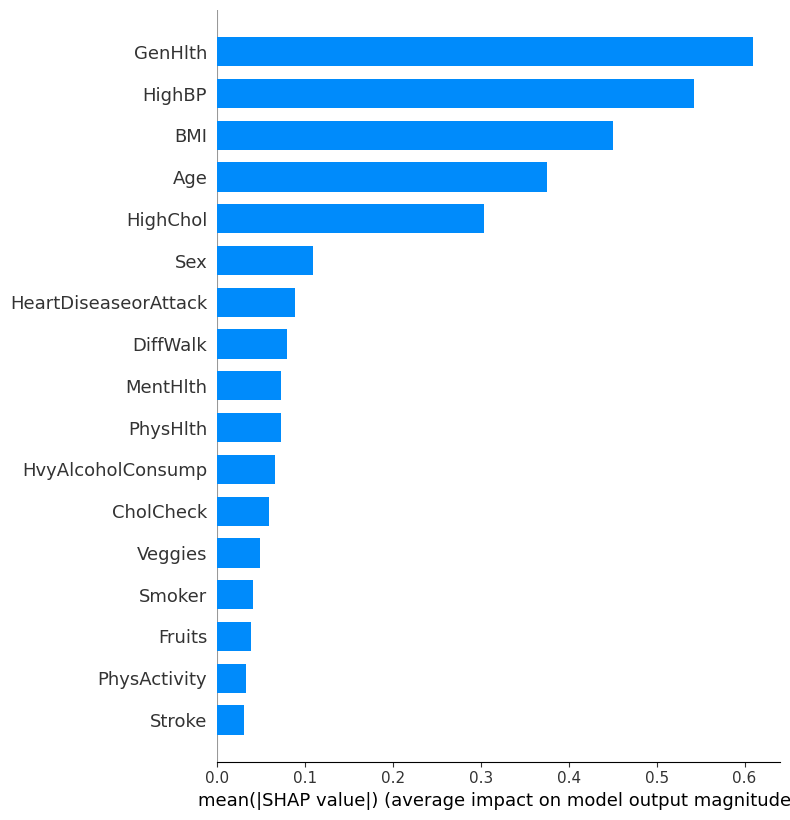

In [ ]:
shap.summary_plot(shap_values, processed_X, plot_type="bar")

R: A nivel de instancia, los shap values muestran el impacto, positivo o negativo, en la predicción. Por otro lado, el aporte a nivel global se obtiene a nivel promedio y como magnitud (es decir, en valor absoluto), luego no permite saber si la variable afecta positiva o negativamente a la predicción.

No obstante, algunas variables relevantes observadas anteriormente vuelven a estar en los primeros lugares, como GenHlth, HighBP y Age.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [136]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = processed_X.columns[shap_values_abs.argsort()[::-1]]

In [137]:
# Revisamos las features
feature_importance_names[:17]

Index(['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'Sex',
       'HeartDiseaseorAttack', 'DiffWalk', 'MentHlth', 'PhysHlth',
       'HvyAlcoholConsump', 'CholCheck', 'Veggies', 'Smoker', 'Fruits',
       'PhysActivity', 'Stroke'],
      dtype='object')

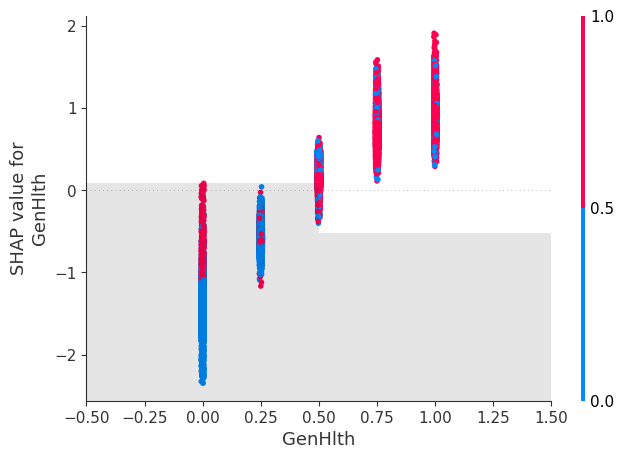

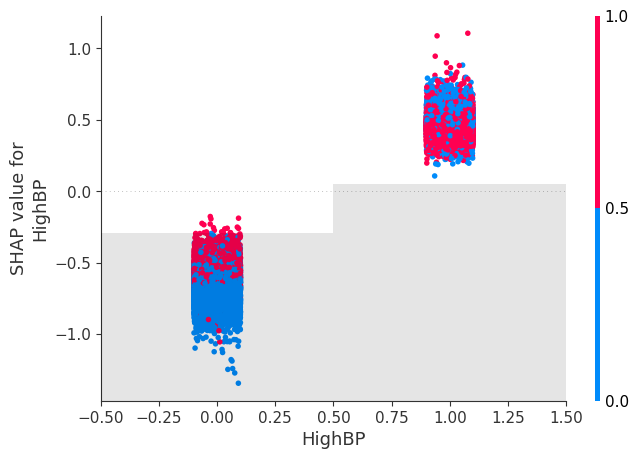

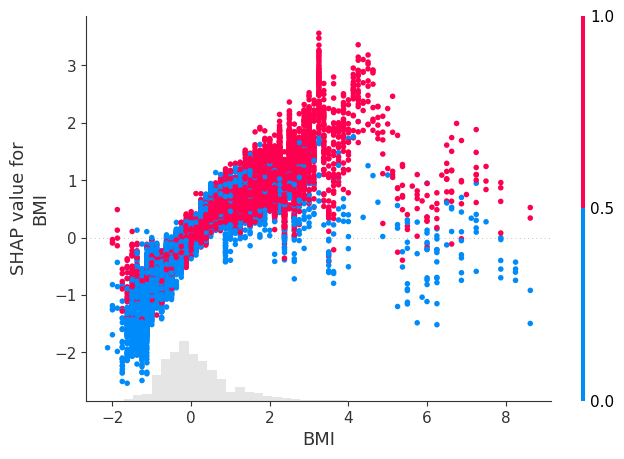

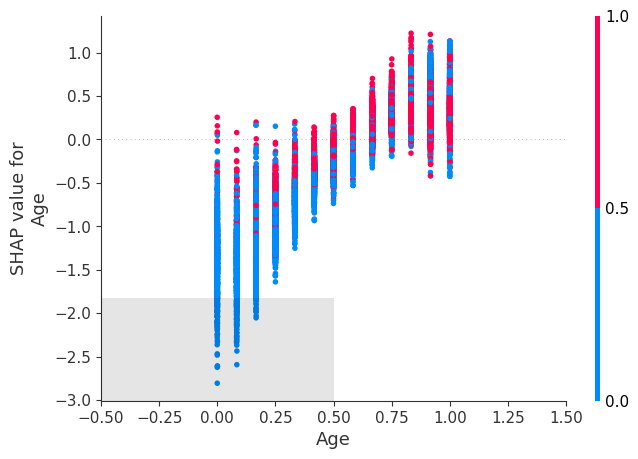

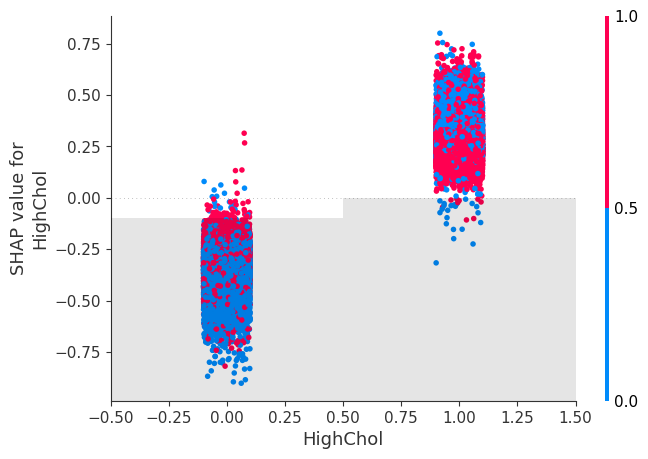

In [ ]:
predictions = xgb_clf.predict(processed_X)
for name in feature_importance_names[:5]:
    shap.plots.scatter(shap_values[:,name], color=predictions)

A partir de los scatterplots, se puede concluir que:
- Para `GenHlth`, los valores más altos están asociados a SHAP values más altos, por lo que afectan positivamente a la predicción. No obstante, la probabilidad de diabetes es algo dispersa, pues tanto el valor más bajo como los dos más altos poseen una gran cantidad de puntos rojos.
- En `HighBP`, una etiqueta positivia tienen SHAP values más altos, por lo que afecta positivamente a la probabilidad. Sin embargo, la mayor cantidad de predicciones positivas se encuentra entre los SHAP -0.5 y 0.5, y no se aprecia un efecto claro de esta variable en la clasificación.
- Para BMI, mientras este es más alto tiene una tendencia a SHAP values más altos, salvo valores sobre 5, donde la relación es más dispersa. Un comportamiento similar se observa en las predicciones positivas. Por lo tanto, el BMI afecta positivamente a la predicción.
- `Age` también tiene una relación creciente con los SHAP values, por lo que afecta positivamente a la predicción. Así también, las predicciones positivas tienden a aumentar con el aumento de la feature.
- Finalmente, `HighChol` tiene un comportamiento similar al de `HighBP`, por lo que se extiende a las mismas conclusiones.

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

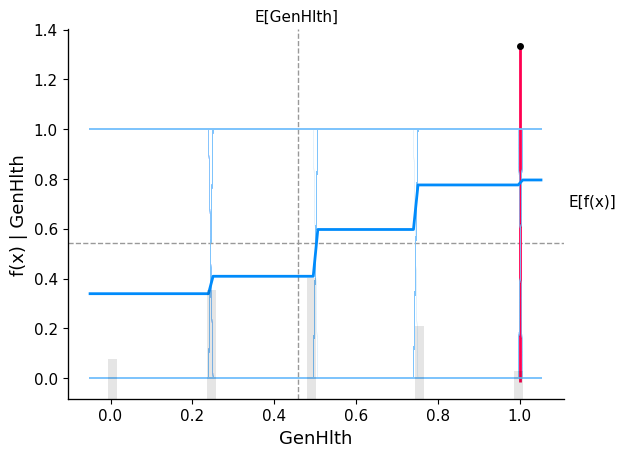

In [144]:
X1000 = shap.utils.sample(processed_X, 1000)

sample_ind = 20
shap.partial_dependence_plot(
    'GenHlth', xgb_clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:],
)

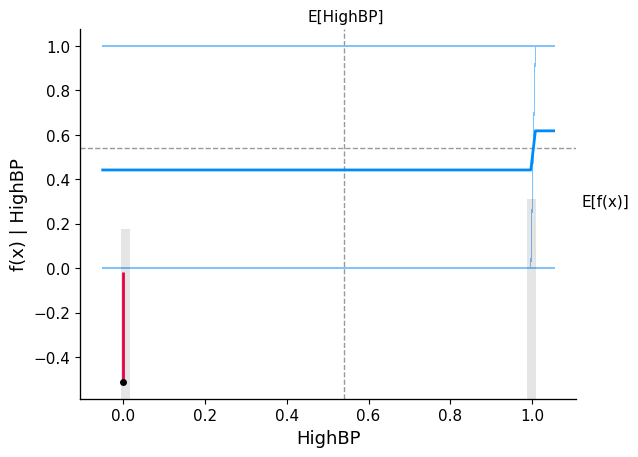

In [145]:
X1000 = shap.utils.sample(processed_X, 1000)

sample_ind = 20
shap.partial_dependence_plot(
    'HighBP', xgb_clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:],
)

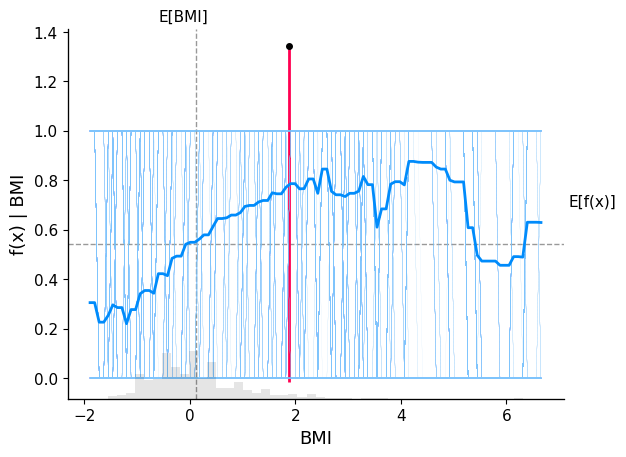

In [146]:
X1000 = shap.utils.sample(processed_X, 1000)

sample_ind = 20
shap.partial_dependence_plot(
    'BMI', xgb_clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:],
)

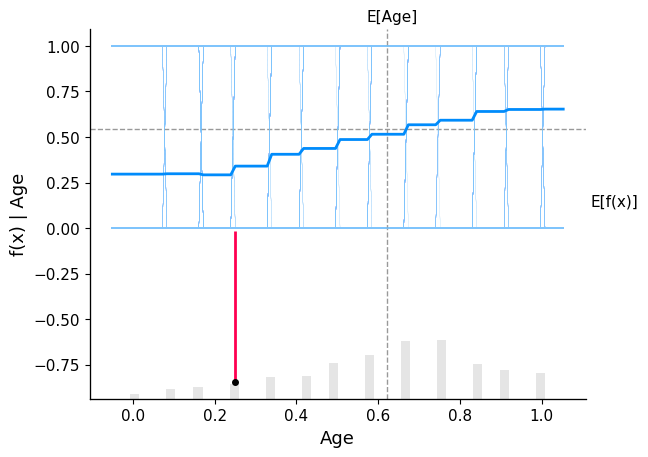

In [147]:
X1000 = shap.utils.sample(processed_X, 1000)

sample_ind = 20
shap.partial_dependence_plot(
    'Age', xgb_clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:],
)

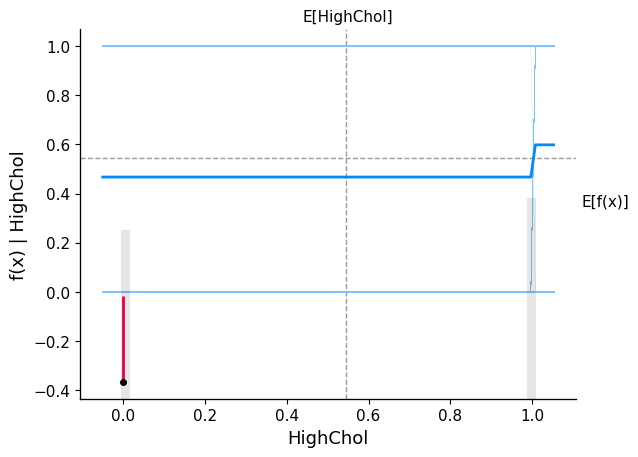

In [148]:
X1000 = shap.utils.sample(processed_X, 1000)

sample_ind = 20
shap.partial_dependence_plot(
    'HighChol', xgb_clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:],
)

¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos? R:
Al analizar los gráficos de Partial Dependence Plot para las cinco variables de mayor impacto global, se observa lo siguiente:
- `GenHlth` y `Age` muestra un efecto marginal positivo sobre la predicción del modelo, similar a lo observado con los scatter plots.
- `HighBP` y `HighChol` muestran una curva casi plana, luego parecieran casi no tener efecto marginal sobre la predicción, por lo que puede que el modelo no los esté empleando de forma relevante para clasificar. Esto se condice con el comportamiento poco definido identificado en los scatter plots.
- `BMI` muestra un efecto marginal positivo hasta cierto valor, donde luego se dispersa el comportamiento, nuevamente similar a lo observado en el caso anterior.

Estos resultados si son generalizables, dado que utilizan el conjunto de testing para su construcción, el cual se espera sea fidedigno a la distribución real de los datos.

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [150]:
from alibi.explainers import AnchorTabular

In [152]:
# Inserte su código para generar sistema de reglas aquí
processed_x_train = subpipeline.transform(X_train)
predict_fn = lambda x: xgb_clf.predict(x) # creamos función de predicción
explainer = AnchorTabular(predict_fn, xgb_clf.feature_names_in_, seed=seed) # instanciamos Anchor usando función creada
explainer.fit(processed_x_train.to_numpy()) # sobre los datos

idx = 1000
# explicar predicción idx 1000
obs = np.array(processed_X.iloc[idx], ndmin = 2) # array de la obs

# generar anchor
explanation = explainer.explain(obs, # obs a explicar
                                threshold=0.90, # min precision de anchor
                                )
print(f"Index {idx}")
print('Prediction: ', explainer.predictor(processed_X.to_numpy()[idx].reshape(1, -1))[0]) # obtener prediccion del modelo
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage, '\n') # obtener cobertura

idx = 3001
# explicar predicción idx 3001
bs = np.array(processed_X.iloc[idx], ndmin = 2) # array de la obs

# generar anchor
explanation = explainer.explain(obs, # obs a explicar
                                threshold=0.90, # min precision de anchor
                                )
print(f"Index {idx}")
print('Prediction: ', explainer.predictor(processed_X.to_numpy()[idx].reshape(1, -1))[0]) # obtener prediccion del modelo
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage, '\n') # obtener cobertura

idx = 5751
# explicar predicción idx 5751
bs = np.array(processed_X.iloc[idx], ndmin = 2) # array de la obs

# generar anchor
explanation = explainer.explain(obs, # obs a explicar
                                threshold=0.90, # min precision de anchor
                                )
print(f"Index {idx}")
print('Prediction: ', explainer.predictor(processed_X.to_numpy()[idx].reshape(1, -1))[0]) # obtener prediccion del modelo
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage) # obtener cobertura

Index 1000
Prediction:  1
Anchor: GenHlth > 0.25 AND HighChol > 0.00 AND Age > 0.83
Precision: 0.93
Coverage: 0.06 

Index 3001
Prediction:  0
Anchor: GenHlth > 0.25 AND HighChol > 0.00 AND Age > 0.67
Precision: 0.92
Coverage: 0.19 

Index 5751
Prediction:  1
Anchor: GenHlth > 0.25 AND HighChol > 0.00 AND Age > 0.67
Precision: 0.94
Coverage: 0.18


Las tres observaciones analizadas (1000, 3001 y 5751) utilizan principalmente las variables `GenHlth`, `HighChol` y `Age` para la toma de decisión del modelo. Las observaciones 1000 y 5751 reciben una predicción positiva para diabetes, mientras que la 3001 resulta en una predicción negativa, a pesar de que la regla aplicada para las dos últimas es igual. Esto sugiere que el modelo puede estar considerando otros factores adicionales en la predicción final.

Las reglas generadas cubren entre el 6% y el 19% de la población total, lo cual indica una cobertura moderada que permite explicar un segmento importante, pero no la totalidad, del conjunto de datos.

Las reglas tienen sentido, dado que involucran variables que han sido identificadas previamente como relevantes para la predicción. Estos factores están asociados a un mayor riesgo de diabetes, lo que valida la coherencia de las reglas con el conocimiento médico y con el comportamiento del modelo.

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

En base al problema de clasificación, los métodos que permiten entregar mejores conclusiones son el uso de SHAP values, tanto a nivel global como local. Por ejemplo, con ellos se puede entender la contribución marginal de cada feature a la clasificación a nivel global, así como también entender las decisiones inviduales tomadas sobre cada observación (paciente). Esto se ve beneficiado de uso de visualizaciones poderosas, como los waterfall plots o los partial dependence plots.

Por otro lado, en el caso del doctor Simi, los métodos más útiles son los locales, dado que permiten explicar, para cada paciente particular, por qué se toma la decisión de clasificarlo con la padecencia de diabetes o no. Esto, en el sentido clínico, es muy relevante, dado que permite asegurarse de que cada paciente está siendo diagnósticado de forma correcta, observando cómo sus características particulares afectan a la decisión del modelo.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>